In [37]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

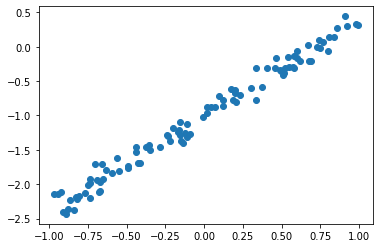

In [38]:
N = 100
D = 1
K = 1
X = np.random.random((N, D)) * 2 - 1
w = np.random.randn(D, K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N, 1) * 0.1
X = X.astype(np.float32)
Y = Y.astype(np.float32)

plt.scatter(X, Y)

In [39]:
class LinearRegression(tf.keras.models.Model):
  def __init__(self, num_inputs, num_outputs):
    super(LinearRegression, self).__init__()
    self.W = tf.Variable(tf.random_normal_initializer()((num_inputs, num_outputs)))
    self.b = tf.Variable(tf.zeros(num_outputs))
    self.params = [self.W, self.b]
    
  def call(self, inputs):
    return tf.matmul(inputs, self.W) + self.b

In [40]:
def get_loss(model, inputs, targets):
  pred = model(inputs)
  error = pred - targets
  return tf.reduce_mean(tf.square(error))

def get_grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    L = get_loss(model, inputs, targets)
  return tape.gradient(L, model.params)

Initial params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[-0.03853587]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


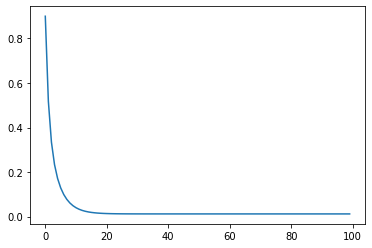

In [42]:
losses = []
learning_rate = 0.2

optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
model = LinearRegression(D, K)
print("Initial params:")
print(model.W)
print(model.b)

for i in range(100):
  g = get_grad(model, X, Y)
  optimizer.apply_gradients(zip(g, model.params))
  losses.append(get_loss(model, X, Y))

plt.plot(losses)

Predicted params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[1.3895793]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-1.0068852], dtype=float32)>
True params:


(array([[1.35350233]]), -1.0339045687928539)

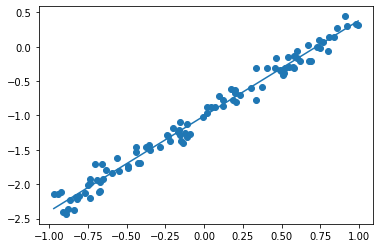

In [50]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1, 1))

plt.scatter(X, Y)
plt.plot(x_axis, y_axis)

print("Predicted params:")
print(model.W)
print(model.b)

print("True params:")
w, b